In [28]:
import pandas as pd
#models
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

#visualization 
import seaborn as sns
#metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import cohen_kappa_score


In [15]:
data = pd.read_csv("iris.csv", sep= ",", header=None, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

In [16]:
data.head(6)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


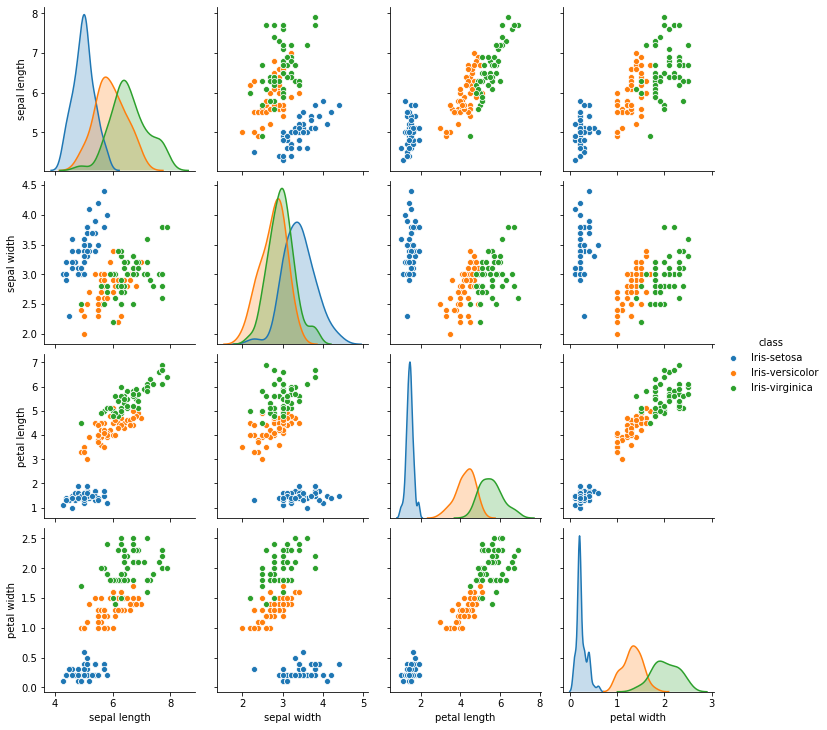

In [17]:
sns.pairplot(data, hue="class")

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:3], data['class'], test_size=0.25, random_state=45)


In [25]:
#check dimensions of the training set (x and the output y)
print(X_train.shape)
print(y_train.shape)


(112, 3)
(112,)


In [26]:
y_train

74     Iris-versicolor
30         Iris-setosa
33         Iris-setosa
82     Iris-versicolor
1          Iris-setosa
            ...       
68     Iris-versicolor
95     Iris-versicolor
32         Iris-setosa
124     Iris-virginica
131     Iris-virginica
Name: class, Length: 112, dtype: object

In [27]:
X_train


,sepal length,sepal width,petal length
74,6.4,2.9,4.3
30,4.8,3.1,1.6
33,5.5,4.2,1.4
82,5.8,2.7,3.9
1,4.9,3.0,1.4
...,...,...,...
68,6.2,2.2,4.5
95,5.7,3.0,4.2
32,5.2,4.1,1.5
124,6.7,3.3,5.7


In [29]:
# Naive Bayes algorithm
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
## accuracy
accuracy = accuracy_score(y_test,pred)
print("naive_bayes")
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("COHEN")
print(cohen_kappa_score(y_test, pred))


naive_bayes
0.8421052631578947
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.62      0.89      0.73         9
 Iris-virginica       0.91      0.67      0.77        15

       accuracy                           0.84        38
      macro avg       0.84      0.85      0.83        38
   weighted avg       0.87      0.84      0.84        38

COHEN
0.7639751552795031


In [30]:
#logistic 
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
pred=logisticRegr.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print(logisticRegr)
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("COHEN")
print(cohen_kappa_score(y_test, pred))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.9473684210526315
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.82      1.00      0.90         9
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.95        38
      macro avg       0.94      0.96      0.94        38
   weighted avg       0.96      0.95      0.95        38

COHEN
0.920335429769392


In [33]:
#svm
Sv=svm.SVC(gamma='scale',kernel='linear')
Sv.fit(X_train, y_train)


pred = Sv.predict(X_test)
# accuracy
accuracy = accuracy_score(y_test,pred)
print(Sv)
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("COHEN")
print(cohen_kappa_score(y_test, pred))


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.9736842105263158
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

COHEN
0.959915611814346
